# Comparing Experimental Sampling Strategies in Science

# An Evaluation of Experimental Sampling Strategies for Autonomous Empirical Research in Cognitive Science

In [1]:
from CS_Simulation.Scientist import scientist 
# scientist class
# 1) collecting data
# 2) training transformer based model by using the collected data

In [2]:
from CS_Simulation.utils import CA

# class for generating the states of cellular automata

In [13]:
from CS_Simulation.utils import DataGen

# {"Image" : current state , "Label" : next_state}

In [4]:
import torch

In [5]:
from tqdm import tqdm
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
pp = {}
system = CA()

pp['side_length'] = 14
pp['rule']={'alive': [2, 3], 'dead': [3]}
system.assign_pp(pp) # assign the rule of the CA

In [8]:
# single_data_size = 5000
# total_data_size = single_data_size * 1
# batch_size = 16
# train_ratio = 0.8
# filename = ''

# random sampling 

In [9]:
scientist1 = scientist("random",196,10,1)

In [10]:
scientist1.initialize_explanation()

In [11]:
# randomly select first 100 samples
for i in range(300):
    scientist1.make_observation(system) # collecting data 
    
    
scientist1.update_explanation(5e-4,0.005,5) # learning rate, weight decay, epochs
    
    
for k in range(30):
    
    for i in range(10):# sampling number 
        scientist1.make_observation(system)
    # learning rate, weight decaying, epochs
    scientist1.update_explanation(1e-4,0.001,5)
    
    
        
    

============== Epoch 0 =============


/home/munjkim/SoS/Complexity_Science/libs/Complexity_Scientist_Simulation/CS_Simulation/Scientist.py:222: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 0] Train Loss : 8.09328777631124 / Train Acc : 59.04166666666667


/home/munjkim/bin/envs/cs_simulation_final/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:1006: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 1] Train Loss : 0.9032875816027324 / Train Acc : 58.72453703703704
<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 2] Train Loss : 0.6453271762530008 / Train Acc : 70.2662037037037
<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 3] Train Loss : 0.6135521499315898 / Train Acc : 72.76851851851852
<generator object Module.parameters at 0x7f3a4b4c6500>
[Epoch 4] Train Loss : 0.6086968143781026 / Train Acc : 72.77546296296296
============== Epoch 0 =============
<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 0] Train Loss : 0.6157652251182064 / Train Acc : 72.19534050179212
<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 1] Train Loss : 0.6018097008428266 / Train Acc : 72.77329749103943
<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch 2] Train Loss : 0.5975388899926216 / Train Acc : 72.77553763440861
<generator object Module.parameters at 0x7f3acc6c7ca0>
[Epoch

### Test

In [12]:
test_state = np.zeros((196,3))

In [13]:
for i in range(14):
    for j in range(14):
        test_state[i*14+j][0] = i 
        test_state[i*14+j][1] = j
        if i==2 &j==3:
            test_state[i*14+j][2]  = 1

In [14]:
key_temp = scientist1.explanation.module.key(torch.tensor(test_state).float().to("cuda:6"))

In [15]:
test_state = torch.tensor(test_state).to("cuda:6")

In [16]:
que_temp = scientist1.explanation.module.query(test_state.float())

In [17]:
kz = [key_temp for _ in range(key_temp.shape[1])]

In [18]:
mask_const = 10000
        
mask = torch.zeros(test_state.unsqueeze(0).shape[0], test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)
mask = mask+torch.eye(test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)*mask_const

In [19]:
ky = key_temp.unsqueeze(0)[:, :, 10* 0:10 * (0 + 1)]
                
kz = [ky for _ in range(ky.shape[1])]

qy = que_temp.unsqueeze(0)[:, :, 10 * 0: 10 * (0+ 1)]
                
    
qz = [qy for _ in range(qy.shape[1])]
                
z = torch.cat((torch.stack(kz, dim=-2), torch.stack(qz, dim=-3)), -1)
               

In [20]:
w = torch.sigmoid(torch.add(scientist1.explanation.module.att(z).squeeze(-1), -mask))

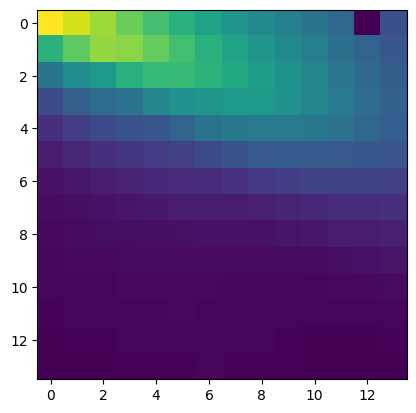

In [21]:
plt.imshow(w[0][12].reshape((14,14)).detach().cpu().numpy())

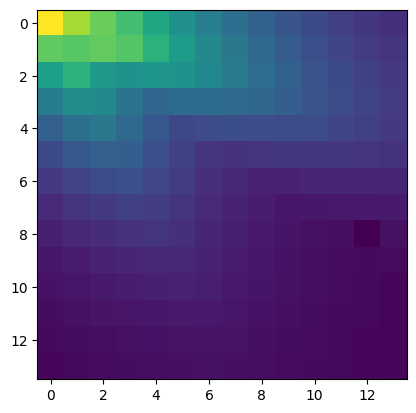

In [22]:
plt.imshow(w[0][124].reshape((14,14)).detach().cpu().numpy())

# safe sampling

In [23]:
scientist2 = scientist("safe",196,10,1)
scientist2.initialize_explanation()
for i in range(100):
    scientist2.make_observation(system)
scientist2.update_explanation(5e-4,0.005,5)
    
    
for k in range(30):
    for i in range(10):
        scientist2.make_observation(system)
    scientist2.update_explanation(1e-4,0.001,5)
    

============== Epoch 0 =============
<generator object Module.parameters at 0x7fa3a881db60>
[Epoch 0] Train Loss : 4.453021440505982 / Train Acc : 55.25694444444444
<generator object Module.parameters at 0x7fa3a881d7e0>
[Epoch 1] Train Loss : 1.093388738632202 / Train Acc : 55.27777777777778
<generator object Module.parameters at 0x7fa3a881c9e0>
[Epoch 2] Train Loss : 0.980328004360199 / Train Acc : 43.82638888888889
<generator object Module.parameters at 0x7fa3a881ef80>
[Epoch 3] Train Loss : 0.7889466404914856 / Train Acc : 59.59027777777778
<generator object Module.parameters at 0x7fa3a881db60>
[Epoch 4] Train Loss : 0.6686279654502869 / Train Acc : 68.86805555555556
============== Epoch 0 =============
<generator object Module.parameters at 0x7fa3a881d7e0>
[Epoch 0] Train Loss : 0.6008519844575362 / Train Acc : 73.23863636363637
<generator object Module.parameters at 0x7fa3a881c9e0>
[Epoch 1] Train Loss : 0.588821635463021 / Train Acc : 73.23863636363637
<generator object Module.pa

### test

In [24]:
test_state = np.zeros((196,3))

for i in range(14):
    for j in range(14):
        test_state[i*14+j][0] = i 
        test_state[i*14+j][1] = j
        if i==2 &j==3:
            test_state[i*14+j][2]  = 1
            



key_temp = scientist2.explanation.module.key(torch.tensor(test_state).float().to("cuda:6"))
test_state = torch.tensor(test_state).to("cuda:6")
que_temp = scientist2.explanation.module.query(test_state.float())


kz = [key_temp for _ in range(key_temp.shape[1])]

mask_const = 10000
        
mask = torch.zeros(test_state.unsqueeze(0).shape[0], test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)
mask = mask+torch.eye(test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)*mask_const


ky = key_temp.unsqueeze(0)[:, :, 10* 0:10 * (0 + 1)]
                
kz = [ky for _ in range(ky.shape[1])]

qy = que_temp.unsqueeze(0)[:, :, 10 * 0: 10 * (0+ 1)]
                
    
qz = [qy for _ in range(qy.shape[1])]
                
z = torch.cat((torch.stack(kz, dim=-2), torch.stack(qz, dim=-3)), -1)
               

In [25]:
w = torch.sigmoid(torch.add(scientist1.explanation.module.att(z).squeeze(-1), -mask))

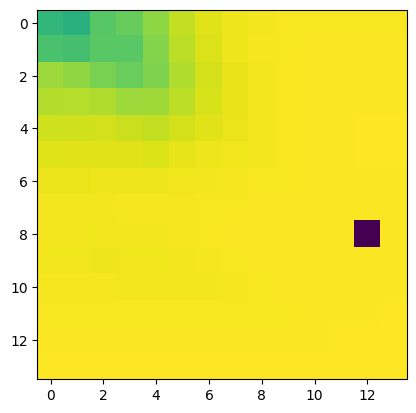

In [26]:
plt.imshow(w[0][124].reshape((14,14)).detach().cpu().numpy())

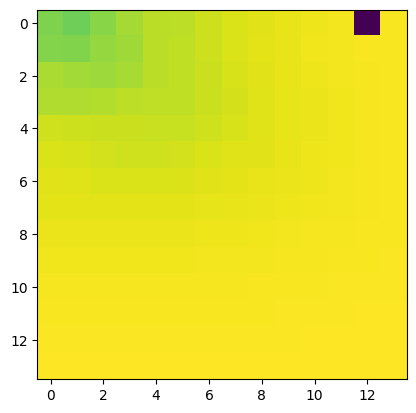

In [27]:
plt.imshow(w[0][12].reshape((14,14)).detach().cpu().numpy())

# risky sampling

In [9]:
scientist3 = scientist("risky",196,10,1)
scientist3.initialize_explanation()
for i in range(100):
    scientist3.make_observation(system)
scientist3.update_explanation(5e-4,0.005,5)
    
    
for k in range(50):
    for i in range(5):
        scientist3.make_observation(system)
    scientist3.update_explanation(5e-4,0.005,3)

============== Epoch 0 =============


/home/munjkim/SoS/Complexity_Science/libs/Complexity_Scientist_Simulation/CS_Simulation/Scientist.py:222: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


<generator object Module.parameters at 0x7fcdcf8a3ca0>
[Epoch 0] Train Loss : 0.8375486350059509 / Train Acc : 70.875


/home/munjkim/bin/envs/cs_simulation_final/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:1006: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


<generator object Module.parameters at 0x7fcd4ea966c0>
[Epoch 1] Train Loss : 0.6041728520393371 / Train Acc : 71.92361111111111
<generator object Module.parameters at 0x7fcdcf8a3ca0>
[Epoch 2] Train Loss : 0.5995855736732483 / Train Acc : 72.80555555555556
<generator object Module.parameters at 0x7fcd4ea96420>
[Epoch 3] Train Loss : 0.5935950207710267 / Train Acc : 73.07638888888889
<generator object Module.parameters at 0x7fcdcf8a3ca0>
[Epoch 4] Train Loss : 0.590622181892395 / Train Acc : 73.09722222222223
============== Epoch 0 =============
<generator object Module.parameters at 0x7fcd4ea96ce0>
[Epoch 0] Train Loss : 0.6060895000185286 / Train Acc : 72.12962962962963
<generator object Module.parameters at 0x7fcd4ea973e0>
[Epoch 1] Train Loss : 0.5978923723811195 / Train Acc : 72.12962962962963
<generator object Module.parameters at 0x7fcd4ea974c0>
[Epoch 2] Train Loss : 0.6017410187494188 / Train Acc : 72.12962962962963
============== Epoch 0 =============
<generator object Module

In [17]:
[i[:,2] for i in scientist3.data["Image"]]

[array([[ 0.,  0.,  0.],
        [ 0.,  1.,  1.],
        [ 0.,  2.,  0.],
        [ 0.,  3.,  0.],
        [ 0.,  4.,  0.],
        [ 0.,  5.,  0.],
        [ 0.,  6.,  1.],
        [ 0.,  7.,  1.],
        [ 0.,  8.,  1.],
        [ 0.,  9.,  0.],
        [ 0., 10.,  1.],
        [ 0., 11.,  0.],
        [ 0., 12.,  0.],
        [ 0., 13.,  0.],
        [ 1.,  0.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  2.,  1.],
        [ 1.,  3.,  1.],
        [ 1.,  4.,  0.],
        [ 1.,  5.,  1.],
        [ 1.,  6.,  1.],
        [ 1.,  7.,  0.],
        [ 1.,  8.,  0.],
        [ 1.,  9.,  0.],
        [ 1., 10.,  1.],
        [ 1., 11.,  1.],
        [ 1., 12.,  1.],
        [ 1., 13.,  1.],
        [ 2.,  0.,  0.],
        [ 2.,  1.,  1.],
        [ 2.,  2.,  0.],
        [ 2.,  3.,  1.],
        [ 2.,  4.,  1.],
        [ 2.,  5.,  1.],
        [ 2.,  6.,  1.],
        [ 2.,  7.,  0.],
        [ 2.,  8.,  1.],
        [ 2.,  9.,  1.],
        [ 2., 10.,  1.],
        [ 2., 11.,  1.],


### test

In [10]:
test_state = np.zeros((196,3))

for i in range(14):
    for j in range(14):
        test_state[i*14+j][0] = i 
        test_state[i*14+j][1] = j
        if i==2 &j==3:
            test_state[i*14+j][2]  = 1
            

scientist3.explanation.eval()

key_temp = scientist3.explanation.module.key(torch.tensor(test_state).float().to("cuda:6"))
test_state = torch.tensor(test_state).to("cuda:6")
que_temp = scientist3.explanation.module.query(test_state.float())


kz = [key_temp for _ in range(key_temp.shape[1])]

mask_const = 10000
        
mask = torch.zeros(test_state.unsqueeze(0).shape[0], test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)
mask = mask+torch.eye(test_state.unsqueeze(0).shape[1], test_state.unsqueeze(0).shape[1]).to(test_state.device)*mask_const


ky = key_temp.unsqueeze(0)[:, :, 10* 0:10 * (0 + 1)]
                
kz = [ky for _ in range(ky.shape[1])]

qy = que_temp.unsqueeze(0)[:, :, 10 * 0: 10 * (0+ 1)]
                
    
qz = [qy for _ in range(qy.shape[1])]
                
z = torch.cat((torch.stack(kz, dim=-2), torch.stack(qz, dim=-3)), -1)
               

In [12]:
w = torch.sigmoid(torch.add(scientist3.explanation.module.att(z).squeeze(-1), -mask))

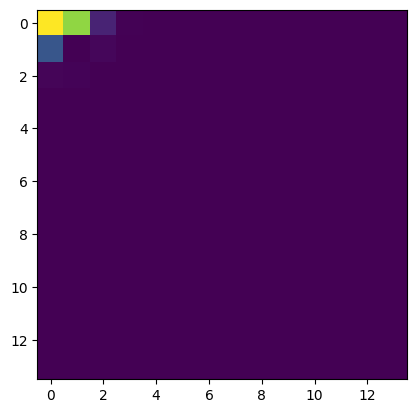

In [13]:
plt.imshow(w[0][15].reshape((14,14)).detach().cpu().numpy())

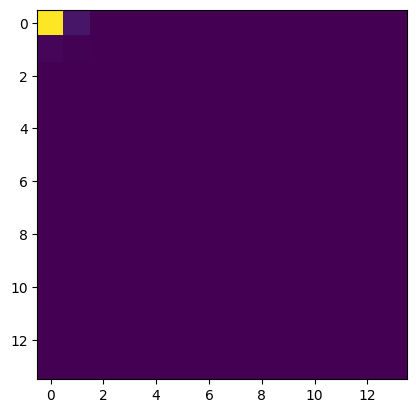

In [16]:
plt.imshow(w[0][150].reshape((14,14)).detach().cpu().numpy())